In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [168]:
train_df = pd.read_csv('../project_2-master/datasets/train.csv')
test_df = pd.read_csv('../project_2-master/datasets/test.csv')

In [169]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [170]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [171]:
# All of the discrete columns + 'SalePrice' since this is for the training dataset
discrete_columns_train = train_df[['Id', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold', 'SalePrice']]

In [172]:
# All of the discrete columns for the test dataset
discrete_columns_test = test_df[['Id', 'Year Built', 'Year Remod/Add', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
                            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Mo Sold']]

In [173]:
# Cannot have null values -- train
discrete_columns_train.isna().sum()

Id                  0
Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     114
Garage Cars         1
Mo Sold             0
SalePrice           0
dtype: int64

In [174]:
# Cannot have null values -- test
discrete_columns_test.isna().sum()

Id                 0
Year Built         0
Year Remod/Add     0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt     45
Garage Cars        0
Mo Sold            0
dtype: int64

In [175]:
# This turns all of the null values in a column into that columns mean
def discrete_nulls(train, test):
    
    # Training dataset with only discrete columns
    for _ in train:
        if train[_].isna().sum() > 0:
            train[_].fillna(np.mean(train[_]), inplace = True)
    
    # Testing dataset with only discrete columns
    for j in test:
        if test[j].isna().sum() > 0:
            test[j].fillna(np.mean(test[j]), inplace = True)
            
    print(train.isna().sum())
    print(test.isna().sum())
            
    return 

In [176]:
discrete_nulls(discrete_columns_train, discrete_columns_test)

Id                0
Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
SalePrice         0
dtype: int64
Id                0
Year Built        0
Year Remod/Add    0
Bsmt Full Bath    0
Bsmt Half Bath    0
Full Bath         0
Half Bath         0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Fireplaces        0
Garage Yr Blt     0
Garage Cars       0
Mo Sold           0
dtype: int64


/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [177]:
discrete_columns_train.describe()

,Id,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,SalePrice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,1971.708922,1984.190151,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,6.219893,181469.701609
std,843.980841,30.177889,21.036250,0.522418,0.251582,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,24.723590,0.764351,2.744736,79258.659352
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,1.000000,12789.000000
25%,753.500000,1953.500000,1964.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,4.000000,129825.000000
50%,1486.000000,1974.000000,1993.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.707796,2.000000,6.000000,162500.000000
75%,2198.000000,2001.000000,2004.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,8.000000,214000.000000
max,2930.000000,2010.000000,2010.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,12.000000,611657.000000


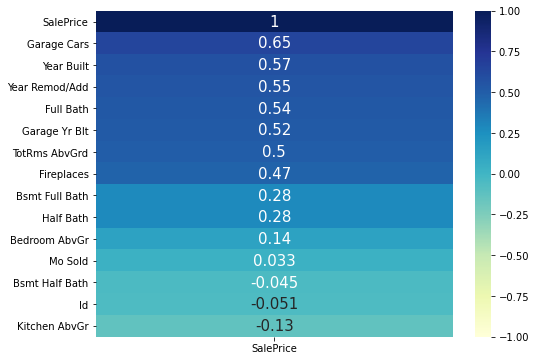

In [178]:
# I only want features with greater than .50 correlation with 'SalePrice'
plt.figure(figsize=(8,6))
sns.heatmap(discrete_columns_train.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

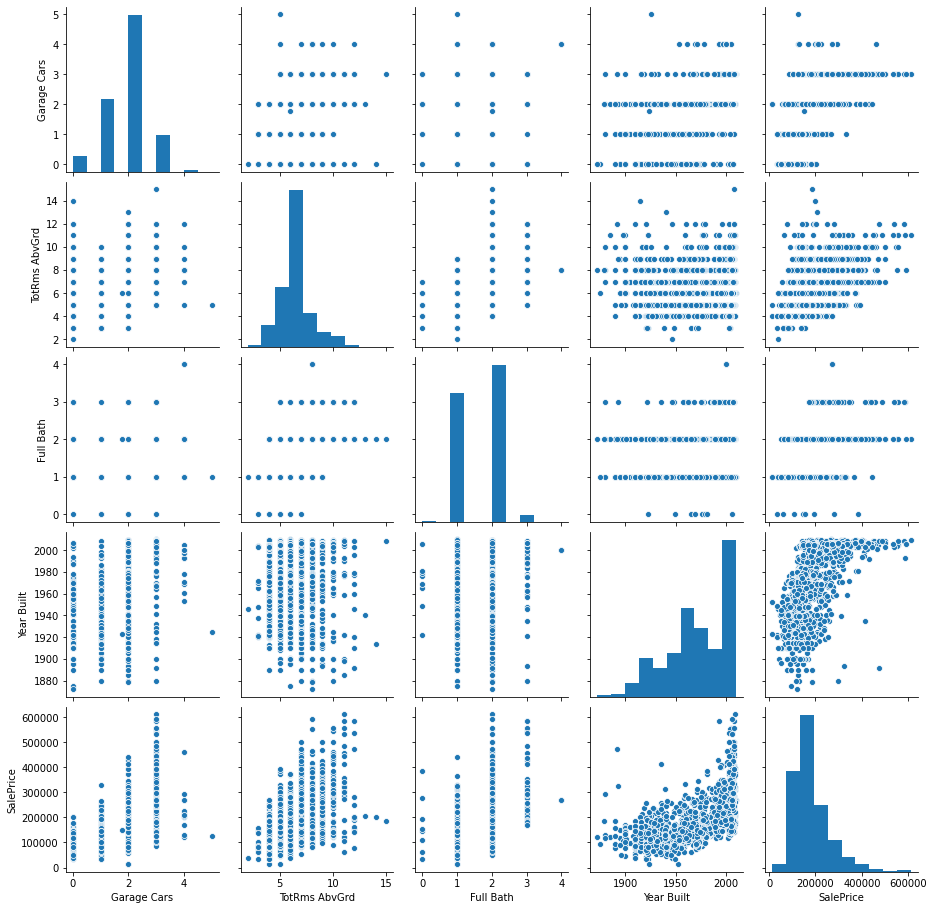

In [182]:
sns.pairplot(discrete_columns_train[['Garage Cars', 'TotRms AbvGrd', 'Full Bath', 'Year Built', 'SalePrice']])

### ***Feature Reasoning***  
- These are all of the features that had a correlation greater than 50% with **'SalePrice'** and didn't have multicollinearity. 
- As we can see **'Year Built'** and **'TotRms AbvGrd'** are fairly linear with **'SalePrice.'** I want to pay attention to the **'Year Built'** column because as we can see the **'SalePrice'** is increasing for newer built properties. 
- **'Garage Cars'** seems like it could be an important feature when modeling.
- If these features are not public knowledge we can contact the home owner ourselves for these values or contact the local real estate agent. However, they should defiently be taken into consideration when deciding if a house is a possible investment or not.

In [179]:
# Discrete functin -- gets columns that are greater than .50 and 
def over_fifty(train, test):
    
    # This gets the columns that are greater than .50 correlation with 'SalePrice'
    corr_over_fifty_cols = train.columns[train.corr()['SalePrice'] > .50] # Credit to Eric Heidbreder
    
    # Training correlation over .50
    final_df_train = train[corr_over_fifty_cols[:-1]]
    final_df_train = final_df_train.join(train['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_train.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_train = final_df_train[cols]

    # Testing correlation over .50
    final_df_test = test[corr_over_fifty_cols[:-1]]
    final_df_test = final_df_test.join(test['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_test.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_test = final_df_test[cols]
    
    # Dropping features I do not want to use in my model because of multicollinearity and outliers
    final_df_train.drop(columns=['Year Remod/Add', 'Garage Yr Blt'], inplace=True)
    final_df_test.drop(columns=['Year Remod/Add', 'Garage Yr Blt'], inplace=True)

    # Send out the csv to main merging function
    final_df_train.to_csv('../project_2-master/datasets/discrete_train.csv', index=False)
    final_df_test.to_csv('../project_2-master/datasets/discrete_test.csv', index=False)
    
    return final_df_test

    # Comment first return and uncomment this to see pairplot
    #return sns.pairplot(final_df_test)

We can see in the pairplot there are some features with outliers and some features that are linear with each other. We need to handle these.

In [180]:
over_fifty(discrete_columns_train, discrete_columns_test)

,Id,Year Built,Full Bath,TotRms AbvGrd,Garage Cars
0,2658,1910,2,9,1
1,2718,1977,2,10,2
2,2414,2006,2,7,2
3,1989,1923,1,5,2
4,625,1963,1,6,2
...,...,...,...,...,...
873,1662,1974,2,8,2
874,1234,1966,2,9,2
875,1373,1968,1,5,1
876,1672,1971,1,5,2
